# Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a popular optimization algorithm used in machine learning and deep learning for minimizing the cost function during the training of a model. It is a variant of gradient descent that updates the model parameters using a subset of the training data (a batch) rather than the entire dataset.

In stochastic gradient descent, the cost function is evaluated and the gradient is computed using a randomly selected subset of the training data. This subset is called a "mini-batch". The model parameters are then updated based on the gradient of the cost function with respect to the parameters and the learning rate, which determines the step size taken in the direction of the gradient.

The advantage of stochastic gradient descent over regular gradient descent is that it is much faster, especially for large datasets, since it only requires a small subset of the data to update the parameters. However, it can be less accurate than regular gradient descent since the noise introduced by the random sampling of the mini-batches can make the optimization process less stable. To mitigate this issue, techniques such as momentum, adaptive learning rate, and regularization are often used in combination with stochastic gradient descent.

While stochastic gradient descent (SGD) is a popular and widely-used optimization algorithm in machine learning, it does have some disadvantages compared to other optimization algorithms:

SGD can be sensitive to the learning rate: The learning rate determines the step size of the optimization algorithm, and finding the optimal learning rate can be challenging in SGD. A learning rate that is too small can result in slow convergence, while a learning rate that is too large can result in unstable behavior and oscillations.

SGD can be noisy: Since SGD updates the model parameters based on a random subset of the training data (a mini-batch), it introduces noise into the optimization process. This can lead to a less stable optimization and slower convergence.

SGD can get stuck in local minima: Like other optimization algorithms, SGD can get stuck in local minima and fail to converge to the global minimum of the cost function.

SGD requires careful tuning of hyperparameters: In addition to the learning rate, SGD also has other hyperparameters that need to be tuned carefully, such as the mini-batch size and the regularization strength.

SGD can be computationally expensive: Since SGD requires multiple passes over the training data to converge, it can be computationally expensive for large datasets, especially if the mini-batch size is small.

Despite these disadvantages, SGD remains a popular and powerful optimization algorithm for machine learning and deep learning, especially for large datasets and high-dimensional models. Many variants of SGD have been developed to address some of these issues, such as momentum, adaptive learning rates, and regularization.

While stochastic gradient descent (SGD) is a popular and widely-used optimization algorithm in machine learning, it does have some disadvantages compared to other optimization algorithms:

SGD can be sensitive to the learning rate: The learning rate determines the step size of the optimization algorithm, and finding the optimal learning rate can be challenging in SGD. A learning rate that is too small can result in slow convergence, while a learning rate that is too large can result in unstable behavior and oscillations.

SGD can be noisy: Since SGD updates the model parameters based on a random subset of the training data (a mini-batch), it introduces noise into the optimization process. This can lead to a less stable optimization and slower convergence.

SGD can get stuck in local minima: Like other optimization algorithms, SGD can get stuck in local minima and fail to converge to the global minimum of the cost function.

SGD requires careful tuning of hyperparameters: In addition to the learning rate, SGD also has other hyperparameters that need to be tuned carefully, such as the mini-batch size and the regularization strength.


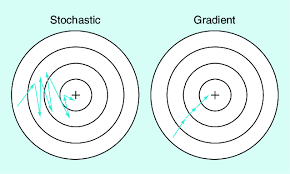

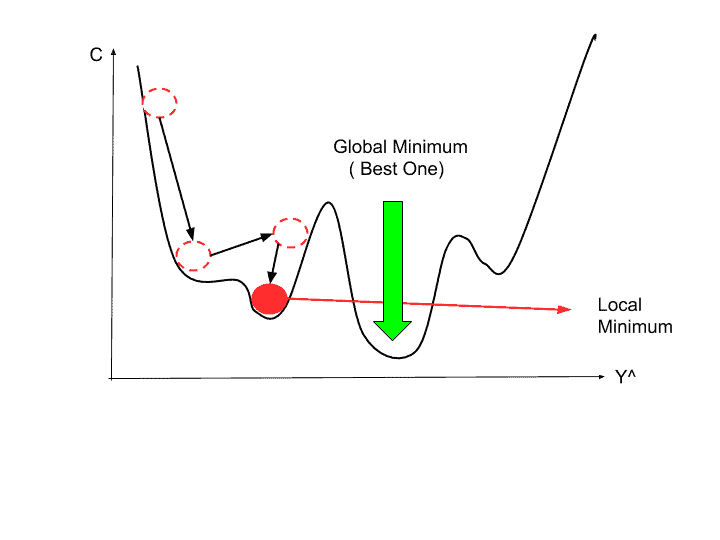

### Formula of Stochastic Gradient Descent
𝛽_𝜊 = intercept_
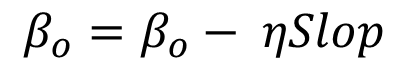

<!--  -->
𝛽_𝑛= Coef_
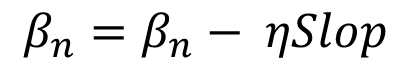

idx = Random Value Generated
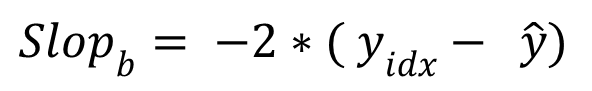

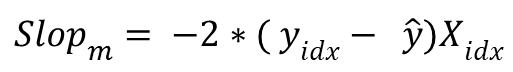

(𝑦_𝑛 ) ̂  = 𝛽_𝑜+ 𝛽_𝑛 𝑋_𝑛𝑚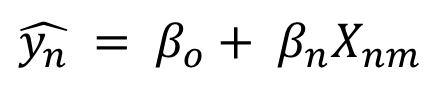

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [4]:

print(lr.coef_)
print()
print(lr.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]

151.88334520854633


## Stochastic Gradient Descent Code from Scatch

In [5]:
class SGDRegressor:
    def __init__(self,learning_rate=0.1,epochs=50):
        self.coef_ = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs
        print("__SGDRegressor__")
        
    def fit(self,X_train,y_train):
        
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for i in range(X_train.shape[0]): 
                
                # Generating the random value 
                idx = np.random.randint(0,X_train.shape[0])
                
                # Y_hat value predicted value
#                 y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                # finding value of coef_
                intercept_der = -2 * ( y_train[idx] - y_hat )
                self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)
                
                # finding value of intercept 
                coef_der = -2 * (np.dot(( y_train[idx] - y_hat),X_train[idx]))
                self.coef_ = self.coef_ - (self.learning_rate * coef_der)
        print(f' coef_: {self.coef_} and intercept_: {self.intercept_}')
            
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
        
        

In [6]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

__SGDRegressor__


In [7]:
sgd.fit(X_train,y_train)

 coef_: [  61.79793203  -35.00246483  313.27407074  235.48557282   31.36973897
   -6.3887907  -166.00599106  133.72173253  293.40404084  131.07320115] and intercept_: 144.47811516489642


In [8]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

 coef_: [  62.25114975  -38.96937893  318.73608658  232.94925056   19.5969514
  -15.15205499 -167.56429635  126.46312452  285.60889761  131.30825108] and intercept_: 143.46150012649943
The time taken is 0.38045549392700195


In [9]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.4072685097521197

# Library of Stochastic Gradient Descent 

In [10]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [11]:
reg.fit(X_train,y_train)

C:\Users\varva\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [12]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.43004113911255426